## Python For Machine Learning Fall 2025
---
# Univariate Linear Regression (in Numpy)

Univariate Linear Regression, or Simple Linear Regression, is the simplest form of Linear Regression. The model predict one target using one variable. Thus, each sample $x_i$, is a scalar. Each $x_i$ associates with one target $y_i$. The linear model is
$$
y = wx + b
$$
where $w$ is the coefficent and the $b$ is intercept. The problem is given a series of samples $x_1, x_2,..., x_n$, and a series of targets $y_1, y_2,..., y_n$. Our goal is to find the best $w$ and $b$, that can accurate predict the value $y$ when given $x$.

As we proposed that we use the following target function, or loss function:\
\begin{equation}
\Sigma^n_{i=1}(\hat{y_i}-y_i)
\end{equation}
where we have:\
$$
\hat{y_i}=wx_i +b
$$

The problem of the above optimization objective is that the result of $\hat{y_i}-y_i$ could be positive and also negative, which will cancel each other out when summing up. We need to either use the absolute value or use the squared values. This lead to the sum of squared errors (SSE) loss:
$$
\Sigma^n_{i=1}(\hat{y_i}-y_i)^2
$$

Substitute that $\hat{y_i}=wx_i+b$, we can write the loss functions as:
$$
L(w,b)=\Sigma^n_{i=1}(wx_i+b-y_i)^2
$$

The final goal is that to find the optimized $w$ and $b$ that minimize the loss, which is:
$$
argmin_{w,b}\Sigma^n_{i=1}(wx_i+b-y_i)^2
$$
The good news is that the optimization of this function has analytical solution.

We can find the optimized $w$ and $b$ by solving the equation that the derivate of SSE loss to zero. Now let's calculate the partial derivates of SSE regarding $w$ and $b$, respectively.

Among the two, the partial derivate regarding $b$ is simplier. We can calculate $b$ as follows:
$$
\frac{\partial L(w,b)}{\partial b}=\Sigma^n_{i=1}2(wx_i+b-y_i)(wx_i+b-y_i)_b'
$$

which is

$$
\frac{\partial L(w,b)}{\partial b}=2\Sigma^n_{i=1}(wx_i+b-y_i)
$$

Set the partial derivate equal to $0$, we get equation:
$$
\Sigma^n_{i=1}(wx_i+b-y_i) = 0
$$

Write the equation out, we get
$$
\Sigma^n_{i=1}wx_i+\Sigma^n_{i=1}b -\Sigma^n_{i=1}y_i=0
$$

Since $\Sigma^n_{i=1}b=nb$, we have
$$
b = \frac{\Sigma^n_{i=1}y_i - w\Sigma^n_{i=1}x_i}{n}
$$

The equation contains another variable $w$, and we can not solve the equation right now.


Next step, we calculate the partial derivate regarding $w$ as follows:

$$
\frac{\partial L(w,b)}{\partial b}=\Sigma^n_{i=1}2(wx_i+b-y_i)(wx_i+b-y_i)_w'
$$

Which is,

$$
\frac{\partial L(w,b)}{\partial b}=\Sigma^n_{i=1}2(wx_i+b-y_i)x_i
$$

Write it out, we get
$$
\frac{\partial L(w,b)}{\partial b}=2\Sigma^n_{i=1}wx_i^2 + 2b\Sigma^n_{i=1}x_i  - 2\Sigma^n_{i=1}x_iy_i
$$

Set the partial derivate to $0$, we have:
$$
\Sigma^n_{i=1}wx_i^2+b\Sigma^n_{i=1}x_i-\Sigma^n_{i=1}x_iy_i=0
$$

Now we substitute
$$
b = \frac{\Sigma^n_{i=1}y_i - w\Sigma^n_{i=1}x_i}{n}
$$
into
$$
\Sigma^n_{i=1}wx_i^2+b\Sigma^n_{i=1}x_i-\Sigma^n_{i=1}x_iy_i=0
$$

We get

$$
\Sigma^n_{i=1}wx_i^2+\frac{\Sigma^n_{i=1}y_i - w\Sigma^n_{i=1}x_i}{n}\Sigma^n_{i=1}x_i-\Sigma^n_{i=1}x_iy_i=0
$$

Write the multiuplication out
$$
\Sigma^n_{i=1}wx_i^2+\frac{\Sigma^n_{i=1}y_i - w\Sigma^n_{i=1}x_i}{n}\Sigma^n_{i=1}x_i-\Sigma^n_{i=1}x_iy_i=0
$$

$$
\Sigma^n_{i=1}wx_i^2 + \frac{1}{n}\Sigma^n_{i=1}y_i \Sigma^n_{i=1}x_i - \frac{1}{n}w\Sigma^n_{i=1}x_i \Sigma^n_{i=1}x_i - \Sigma^n_{i=1}x_iy_i=0
$$

Using transposition,
$$
w\Sigma^n_{i=1}x_i^2-w\frac{1}{n}\Sigma^n_{i=1}x_i \Sigma^n_{i=1}x_i =\Sigma^n_{i=1}x_iy_i-\frac{1}{n}\Sigma^n_{i=1}y_i \Sigma^n_{i=1}x_i
$$

Note $\bar{x}=\frac{1}{n}\Sigma^n_{i=1}x_i$, and $\bar{y}=\frac{1}{n}\Sigma^n_{i=1}y_i$, we get a simpler equation:
$$
w=\frac{\Sigma^n_{i=1}x_iy_i-\Sigma^n_{i=1}y_i\bar{x}}{\Sigma^n_{i=1}x_i^2-\Sigma^n_{i=1}x_i\bar{x}}
$$

which is
$$
w=\frac{\Sigma^n_{i=1}y_i(x_i-\bar{x})}{\Sigma^n_{i=1}x_i(x_i-\bar{x})}
$$

The numerator and denominator can be expressed in terms of convariance an variance, to provide more stable and convinient calculation. Let's start from the first form of our equation:
$$
w=\frac{\Sigma^n_{i=1}x_iy_i-\Sigma^n_{i=1}y_i\bar{x}}{\Sigma^n_{i=1}x_i^2-\Sigma^n_{i=1}x_i\bar{x}}
$$

Since we have:
$$
n\bar{x}\bar{y}=n\bar{x}\frac{1}{n}\Sigma_{i=1}^ny_i=\Sigma_{i=1}^ny_i\bar{x}
$$
,
$$
n\bar{x}\bar{y}=n\bar{y}\frac{1}{n}\Sigma_{i=1}^nx_i=\Sigma_{i=1}^nx_i\bar{y}
$$
, and
$$
n\bar{x}\bar{y}=\Sigma_{i=1}^n\bar{x}\bar{y}
$$

We can rewrite the numerator as:
$$
\Sigma^n_{i=1}x_iy_i-\Sigma^n_{i=1}y_i\bar{x}=\Sigma^n_{i=1}(x_iy_i-x_i\bar{y}-y_i\bar{x}+\bar{x}\bar{y})
$$
Futhur, it can be rewrote as:
$$
\Sigma^n_{i=1}(x_i(y_i-\bar{y})-\bar{x}(y_i-\bar{y}))=\Sigma^n_{i=1}((y_i-\bar{y})(x_i-\bar{x}))
$$
Whic is the covariance between variable $x$ and $y$.

For denominator, we can rewrite it as:
$$
\Sigma^n_{i=1}x_i^2-\Sigma^n_{i=1}x_i\bar{x}=\Sigma^n_{i=1}(x_i^2-x_i\bar{x})
$$

We can get the same conclusion that:
$$
n\bar{x}\bar{x}=\Sigma_{i=1}^n\bar{x}\bar{x}=\Sigma_{i=1}^nx_i\bar{x}=\Sigma_{i=1}^n\bar{x}x_i
$$
So, the denominator equals to
$$
\Sigma^n_{i=1}(x_i^2-x_i\bar{x})=\Sigma^n_{i=1}(x_i^2-x_i\bar{x}-x_i\bar{x}+\bar{x}\bar{x}) = \Sigma_{i-1}^n(x_i-\bar{x})^2
$$

Which is the variance of $x$.

Thus, we get a stable and computable formula of $w$, as follows:
$$
w=\frac{\Sigma^n_{i=1}((y_i-\bar{y})(x_i-\bar{x}))}{\Sigma_{i-1}^n(x_i-\bar{x})^2}
$$

Given the value of $w$ in hand, we can calculate the value of $b$ accordingly. Recall the equation of $b$, as follows:

$$
b = \frac{\Sigma^n_{i=1}y_i - w\Sigma^n_{i=1}x_i}{n}
$$

We can rewrite it as

$$
b = \bar{y}-w\bar{x}
$$

We mentioned that `sklearn` is based one a few packages. One of the most import libary is `numpy`. Now let's implement the univariate linear regression in numpy.

In [7]:
from sklearn.datasets import make_regression

feature, target = make_regression(n_features=1, n_samples=100, noise=5)

# print(type(feature), feature)
# print(type(target), target)
print(feature.ndim, target.ndim)

2 1


Use `make_regression` to randomly generate a group of `samples`.

It is always easier if you can visualize the data. That is also another benefits we use simple linear regression as example, in addition to the simplicity of the math.

Here we use `matplotlib` library to do the visualization. The `scatter` function can conviniently plot the sample points on a 2d surface.

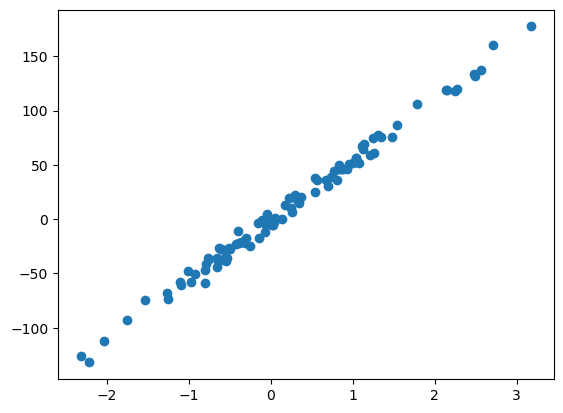

In [12]:
import matplotlib.pyplot as plt

plt.scatter(feature, target)
plt.show()

Now let's calculate the value of $w$, according to our equation:
$$
w=\frac{\Sigma^n_{i=1}((y_i-\bar{y})(x_i-\bar{x}))}{\Sigma_{i-1}^n(x_i-\bar{x})^2}
$$

The features and targets are already in `numpy` array.

In [14]:
import numpy as np

In our case, `feature` and `target` are slightly different.

`feature` is a 2d array, and `target` is a 1d array.

In [15]:
print(feature.ndim, target.ndim)

2 1


Task 1 will be calculate the mean value of $\bar{x}$ and $\bar{y}$. `numpy` provide `mean` function to calculate the mean value of an array.

In [18]:
x_bar = np.mean(feature)
y_bar = np.mean(target)
print(x_bar, y_bar)

0.23809300748140338 12.617858348360302


`numpy` array support a cool feature, which is called `broadcast`.

In [23]:
x_sub = feature - x_bar
y_sub = target - y_bar

Now we need to do a point-to-point, or element-wise mulitplication in between array `feature` and `y_sub`, as well as `feature` and `x_sub`. One issue is that due to the different `ndim` values between the two, the multiplication will perform wierd.

In [33]:
# w = cov(X) / var(X)
numerator = np.sum(x_sub.flatten() * y_sub)
denominator = np.sum(x_sub.flatten() * x_sub.flatten())

w = numerator / denominator
print(w)

55.02110982977082


No we can calculate the value of $b$

In [35]:
b = y_bar - (w * x_bar)
print(b)

-0.48228316597443843


Now we have the model $y=wx+b$ estimated.

To test it, we create a function that create the output based on $w$ and $b$

In [38]:
def predict(feature, w, b):
    return (w * feature) + b

preds = predict(feature, w, b)
print(preds)

[[-3.41701704e+01]
 [ 7.19638218e+00]
 [ 1.46218141e-01]
 [ 1.39050549e+01]
 [-7.05089333e+01]
 [ 5.04683353e+01]
 [ 2.20858090e+00]
 [-1.28269668e+02]
 [-9.10982041e+00]
 [-2.77222294e+00]
 [ 1.70415051e+01]
 [-2.05931188e+01]
 [-1.22590017e+02]
 [ 3.96839972e+01]
 [-3.57083965e+01]
 [ 8.77083526e-01]
 [-5.40013705e+01]
 [ 4.71044985e+01]
 [-3.64911302e+01]
 [-4.44050790e+01]
 [-4.29021165e+00]
 [-9.68047681e+01]
 [-3.22618620e+01]
 [-3.19545705e+01]
 [ 6.19931780e+01]
 [ 8.42756144e+01]
 [ 5.19737174e+01]
 [ 4.53476281e+01]
 [ 6.80325833e+01]
 [-4.22505504e+01]
 [ 1.54724042e+01]
 [ 1.58341234e+01]
 [-3.37852755e+00]
 [ 1.74452819e+02]
 [ 1.31910300e+01]
 [-2.80857727e+01]
 [-6.17905345e+01]
 [ 4.50026304e+01]
 [ 1.24164144e+02]
 [-5.13066836e+01]
 [-2.40693935e+01]
 [ 6.17008519e+01]
 [-4.29218367e+01]
 [ 1.86860027e+01]
 [-3.01370186e+01]
 [ 1.23177858e+02]
 [ 2.92104837e+01]
 [-1.45278988e+01]
 [ 6.60790854e+01]
 [ 4.20662389e+01]
 [ 1.72060873e+01]
 [ 1.36642103e+02]
 [ 1.4868103

Now we are ready to plot the data and the `line` we estimated.

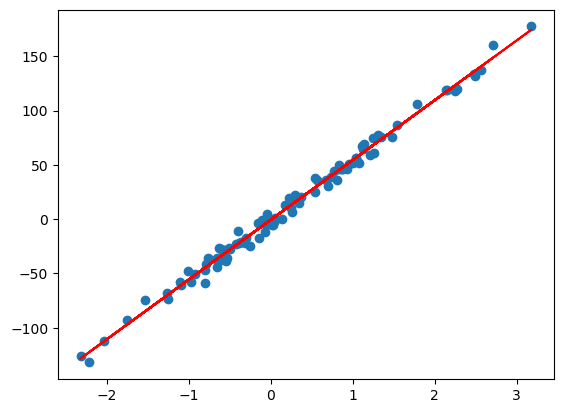

In [41]:
plt.scatter(feature, target)
plt.plot(feature, preds, 'r')
plt.show()

Validate with `sklearn`

In [42]:
from sklearn.linear_model import LinearRegression

# Create linear regression model and fit it to the data
model = LinearRegression().fit(feature, target)
print(model.coef_, w, model.intercept_, b)


[55.02110983] 55.02110982977082 -0.48228316597444554 -0.48228316597443843
